# 1. Perkenalan

 
   ==============================================
   
   Churn prediction

    Nama  : Nugroho Wicaksono
    Role  : Data Analyst & Scientist

    The Customer Churn Prediction System is a comprehensive machine learning solution that enables telecommunications companies to forecast customer churn probability. This end-to-end platform empowers businesses to proactively identify at-risk customers and implement targeted retention strategies to enhance customer retention rates.

    App Model deployment sites : https://huggingface.co/spaces/HeXzoE/TELECOM_churn_detection
    
   ==============================================

# 2. Import Libraries

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import pickle
import json

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV

from sklearn.pipeline import Pipeline as sklPipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_classif

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier



# 3. Data Loading

In [2]:
ds = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#Duplicated Dataset

ds_duplicate = ds.copy()

In [4]:
#check dataset
ds_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# mencari data duplikat pada datafrme 
ds_duplicate.duplicated().sum()

0

In [6]:
# melihat total dari missing value masing masing kolom
ds_duplicate.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#cek statistik sederhana pada dataset
ds_duplicate.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# 4. Exploratory Data Analysis (EDA)

## 4.1 Churn Distribution

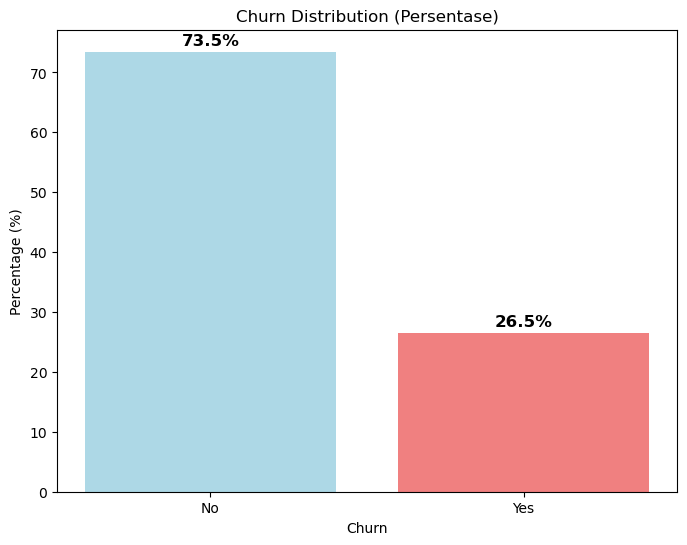

In [8]:
# Bar plot dengan persentase
plt.figure(figsize=(8, 6))
churn_percentage = ds_duplicate['Churn'].value_counts(normalize=True) * 100
bars = plt.bar(churn_percentage.index, churn_percentage.values, color=['lightblue', 'lightcoral'])

# Tambahkan nilai persentase di atas bar
for bar, value in zip(bars, churn_percentage.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Churn Distribution (Persentase)')
plt.ylabel('Percentage (%)')
plt.xlabel('Churn')
plt.show()



## 4.2 Gender Distribution

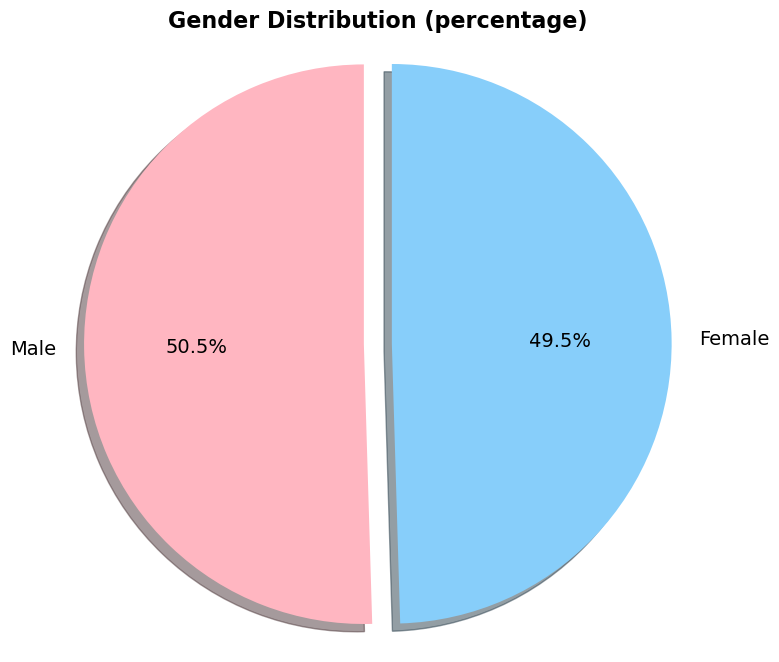

In [9]:
# Gender distribution - pie chart
plt.figure(figsize=(8, 8))
gender_counts = ds_duplicate['gender'].value_counts()
colors = ['#ffb6c1', '#87cefa']  # Pink for Female, Blue for Male
explode = (0.05, 0.05)  # Sedikit explode

plt.pie(gender_counts, 
        labels=gender_counts.index, 
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 14})

plt.title('Gender Distribution (percentage)', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

## 4.3 contract Breakdown

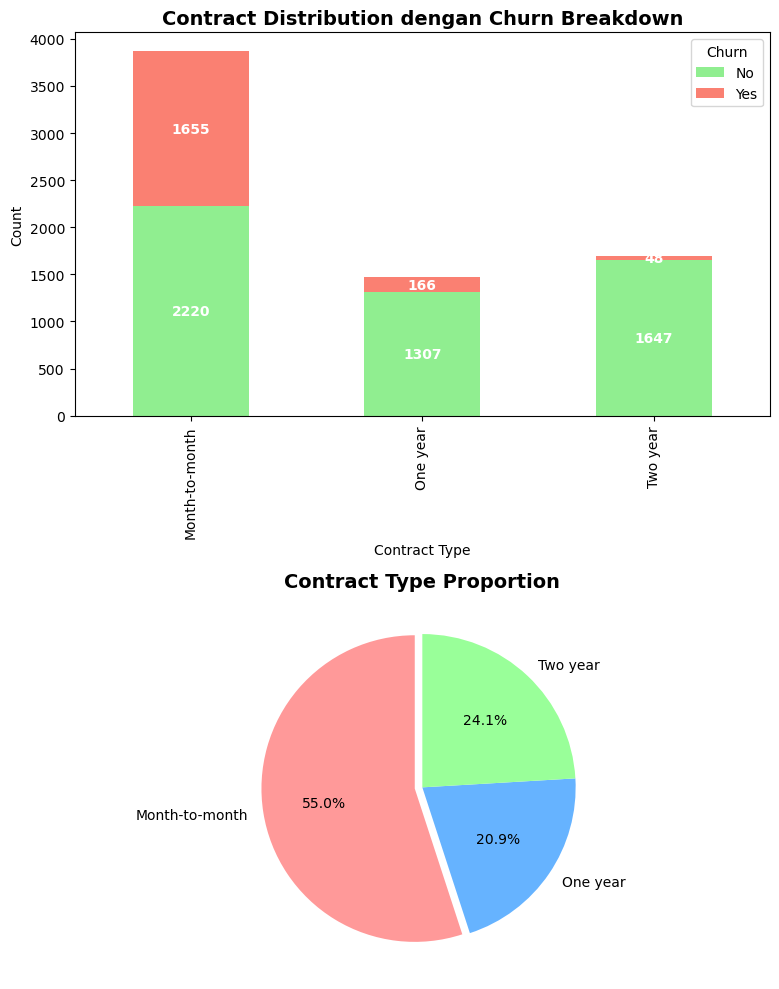

In [10]:
# Contract distribution dengan churn breakdown
plt.figure(figsize=(15, 10))

# Plot 1: Stacked bar chart
plt.subplot(2, 2, 1)
contract_churn = pd.crosstab(ds_duplicate['Contract'], ds_duplicate['Churn'])
contract_churn = contract_churn.reindex(['Month-to-month', 'One year', 'Two year'])
ax1 = contract_churn.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'], ax=plt.gca())

# Tambahkan label count
for container in ax1.containers:
    ax1.bar_label(container, label_type='center', fmt='%.0f', color='white', fontweight='bold', fontsize=10)

plt.title('Contract Distribution dengan Churn Breakdown', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')

# Plot 3: Pie chart untuk contract distribution
plt.subplot(2, 2, 3)
contract_counts = ds_duplicate['Contract'].value_counts().reindex(['Month-to-month', 'One year', 'Two year'])
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(contract_counts.values, labels=contract_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=(0.05, 0, 0))
plt.title('Contract Type Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4.4 Payment method Distribution

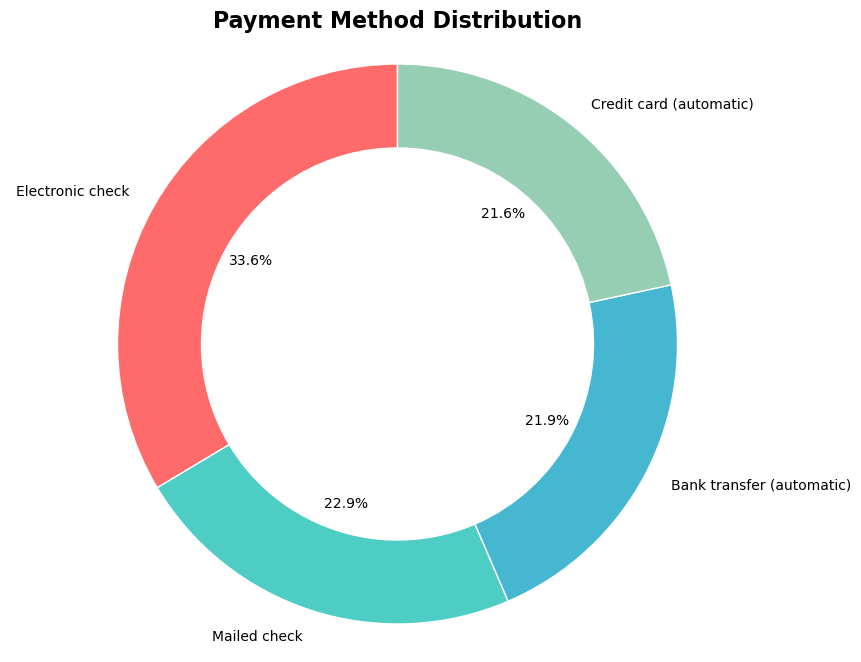

In [11]:
# Payment Method Distribution - Donut Chart
plt.figure(figsize=(10, 8))
payment_counts = ds_duplicate['PaymentMethod'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

plt.pie(payment_counts.values, 
        labels=payment_counts.index, 
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.3, edgecolor='w'))  # width untuk donut effect

# Tambahkan circle di tengah
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Payment Method Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

## 4.5 Customer Payment Method Distribution by churn

<Figure size 1200x800 with 0 Axes>

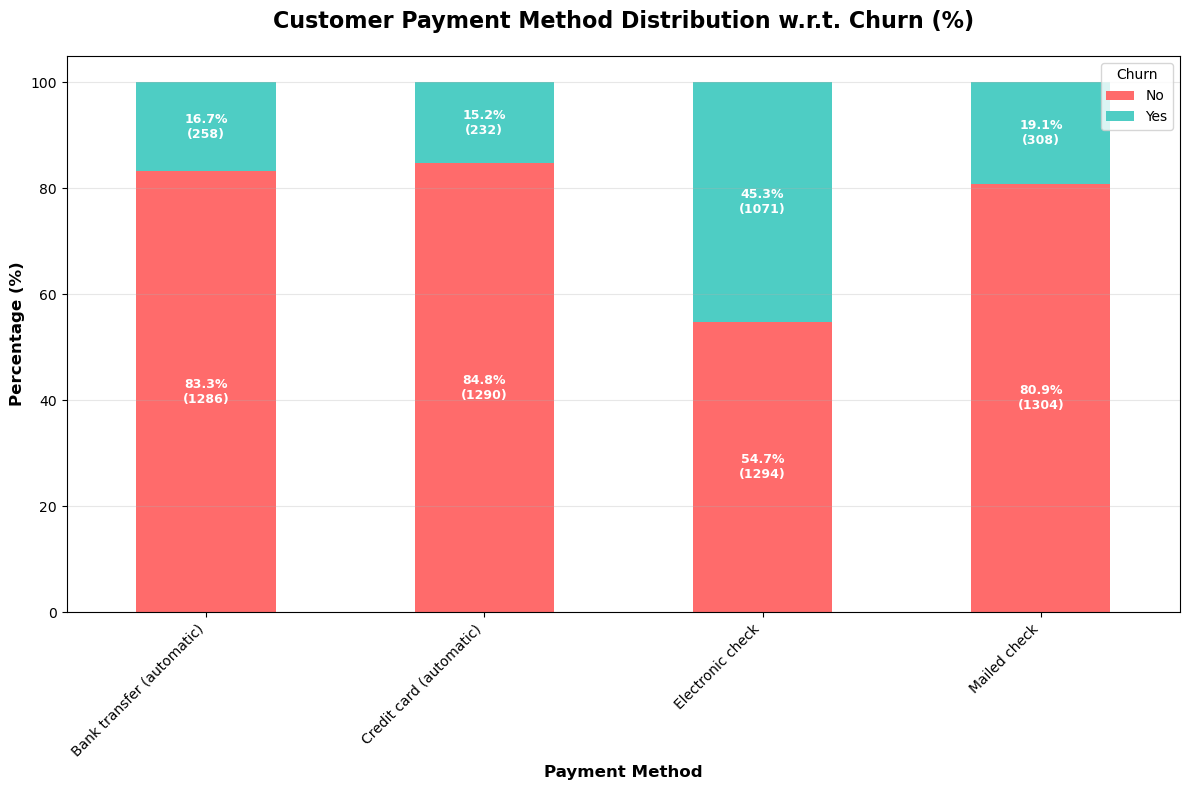

In [12]:
# Dengan persentase churn
plt.figure(figsize=(12, 8))

# Hitung persentase
payment_churn_pct = pd.crosstab(ds_duplicate['PaymentMethod'], ds_duplicate['Churn'], normalize='index') * 100
payment_churn_count = pd.crosstab(ds_duplicate['PaymentMethod'], ds_duplicate['Churn'])

# Plot
ax = payment_churn_pct.plot(kind='bar', stacked=True, color=colors, figsize=(12, 8))

plt.title('Customer Payment Method Distribution w.r.t. Churn (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Payment Method', fontsize=12, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Churn', loc='upper right')

# Tambahkan persentase dan count
for i, (idx, row) in enumerate(payment_churn_pct.iterrows()):
    no_pct = row['No']
    yes_pct = row['Yes']
    no_count = payment_churn_count.loc[idx, 'No']
    yes_count = payment_churn_count.loc[idx, 'Yes']
    
    plt.text(i, no_pct/2, f'{no_pct:.1f}%\n({no_count})', ha='center', va='center', 
             fontweight='bold', color='white', fontsize=9)
    plt.text(i, no_pct + yes_pct/2, f'{yes_pct:.1f}%\n({yes_count})', ha='center', va='center', 
             fontweight='bold', color='white', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4.6 Distribution of monthly charges by churn


C:\Users\damar\AppData\Local\Temp\ipykernel_1588\688387042.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(ds_duplicate.MonthlyCharges[(ds_duplicate["Churn"] == 'No')],
C:\Users\damar\AppData\Local\Temp\ipykernel_1588\688387042.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(ds_duplicate.MonthlyCharges[(ds_duplicate["Churn"] == 'Yes')],


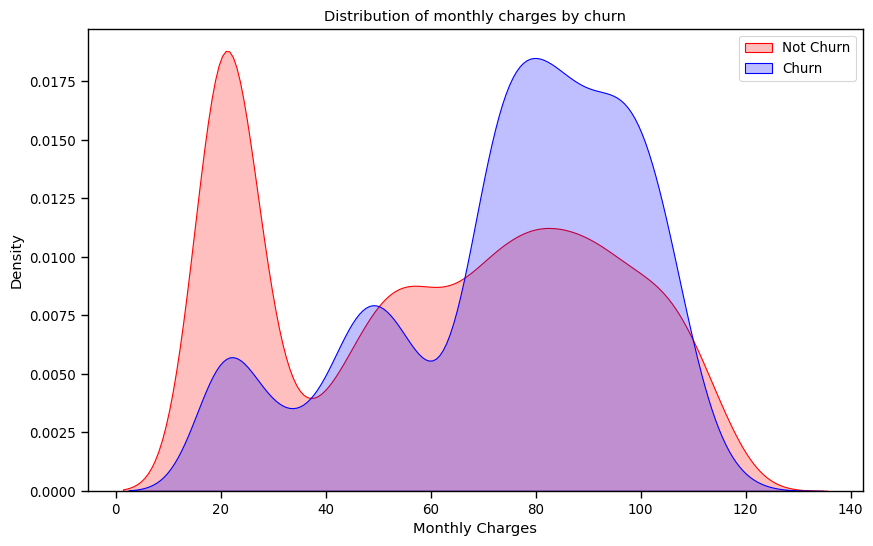

In [13]:
# Distribution of monthly charges by churn
sns.set_context("paper", font_scale=1.1)

plt.figure(figsize=(10, 6))
ax = sns.kdeplot(ds_duplicate.MonthlyCharges[(ds_duplicate["Churn"] == 'No')],
                 color="Red", shade=True)
ax = sns.kdeplot(ds_duplicate.MonthlyCharges[(ds_duplicate["Churn"] == 'Yes')],
                 ax=ax, color="Blue", shade=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

plt.show()

# 5. Feature Engineering

In [14]:

pd.set_option('display.max_colwidth', None)

kategorikal_ordinal = ['Contract']
kategorikal_nominal = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
          'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
          'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
          'PaymentMethod']

# Gabung dan analisis
listItem = [[col, ds_duplicate[col].nunique(), ds_duplicate[col].unique()] for col in kategorikal_nominal + kategorikal_ordinal]
pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,gender,2,"[Female, Male]"
1,Partner,2,"[Yes, No]"
2,Dependents,2,"[No, Yes]"
3,PhoneService,2,"[No, Yes]"
4,MultipleLines,3,"[No phone service, No, Yes]"
5,InternetService,3,"[DSL, Fiber optic, No]"
6,OnlineSecurity,3,"[No, Yes, No internet service]"
7,OnlineBackup,3,"[Yes, No, No internet service]"
8,DeviceProtection,3,"[No, Yes, No internet service]"
9,TechSupport,3,"[No, Yes, No internet service]"


In [15]:
ds_duplicate.drop(columns=['customerID'], inplace=True, errors='ignore')


In [16]:
ds_duplicate['TotalCharges'] = pd.to_numeric(ds_duplicate['TotalCharges'], errors='coerce')

In [17]:
ds_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## 5.1 Handling missing value

In [18]:
ds_duplicate.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
# Tampilkan rows yang memiliki missing value di TotalCharges
missing_total_charges = ds_duplicate[ds_duplicate['TotalCharges'].isnull()]

print("ROWS DENGAN MISSING VALUE DI TOTALCHARGES:")
print("=" * 50)
print(f"Jumlah rows dengan missing value: {len(missing_total_charges)}")
display(missing_total_charges)

ROWS DENGAN MISSING VALUE DI TOTALCHARGES:
Jumlah rows dengan missing value: 11


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [20]:
missing_mask = ds_duplicate['TotalCharges'].isnull()

print("QUICK MISSING TYPE DETECTION")
print("=" * 35)

# Check 1: Structural (paling mudah dicek)
if ((ds_duplicate['tenure'] == 0) & missing_mask).sum() > 0:
    print("✅ STRUCTURAL MISSING - Karena tenure = 0")
    
# Check 2: MAR (terkait variabel lain)  
elif ds_duplicate[missing_mask]['tenure'].mean() < ds_duplicate[~missing_mask]['tenure'].mean():
    print("✅ MAR - Terkait tenure rendah")
    
# Check 3: MCAR (default)
else:
    print("✅ MCAR - Acak tanpa pola jelas")

QUICK MISSING TYPE DETECTION
✅ STRUCTURAL MISSING - Karena tenure = 0


In [21]:
# Handling: Isi dengan 0 (karena tenure = 0, wajar total charges = 0)
ds_duplicate['TotalCharges'] = ds_duplicate['TotalCharges'].fillna(0)


In [22]:
ds_duplicate.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 5.2 Split Betweet X (Features) and Y (target)

In [23]:
# pisahkan bagian fitur dan target
x = ds_duplicate.drop(['Churn'], axis=1) # features
y = ds_duplicate[['Churn']] # target

x.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15


In [24]:
y.value_counts()

Churn
No       5174
Yes      1869
Name: count, dtype: int64

## 5.3 Splitting between Train Set and Test set

In [25]:
# split x train, test dengan y train, test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 44, stratify=y)
print('Train Size', x_train.shape)
print('Test Size', x_test.shape)

Train Size (5634, 19)
Test Size (1409, 19)


## 5.4 Encoding Target (Nominal)


In [26]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
# Cek mapping
print("Label Encoding Mapping:")
print(f"No → {le.transform(['No'])[0]}")
print(f"Yes → {le.transform(['Yes'])[0]}")

Label Encoding Mapping:
No → 0
Yes → 1


f:\miniconda3\envs\project1_churn\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\miniconda3\envs\project1_churn\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


## 5.5 Handling Outliers

In [27]:
num_cols_outlier = ['tenure', 'MonthlyCharges', 'TotalCharges']
num_cols_outlier

['tenure', 'MonthlyCharges', 'TotalCharges']

In [28]:
listItem= []

for col in num_cols_outlier:
  listItem.append([col, round(x_train[col].skew(),1), np.where(
    (round(x_train[col].skew(),1) <= 0.5) & (round(x_train[col].skew(),1) >= -0.5),
    'normal','skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,tenure,0.2,normal
1,MonthlyCharges,-0.2,normal
2,TotalCharges,1.0,skewed


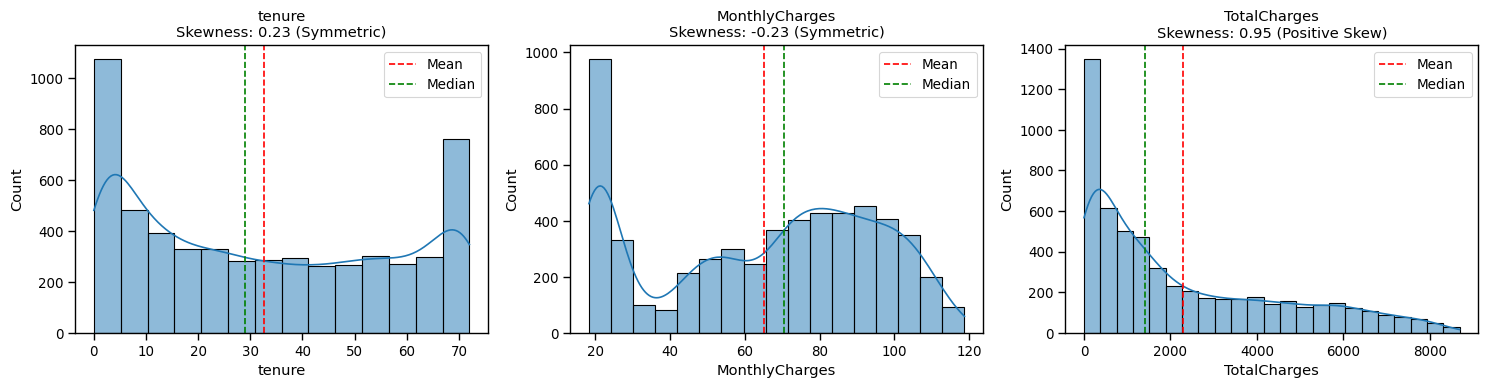

In [29]:
fig, axes = plt.subplots(1, len(num_cols_outlier), figsize=(15, 4))

for i, col in enumerate(num_cols_outlier):
    skew_val = x_train[col].skew()
    mean_val = x_train[col].mean()
    median_val = x_train[col].median()
    
    # Tentukan tipe skewness
    if abs(skew_val) < 0.5:
        skew_type = "Symmetric"
    elif skew_val > 0:
        skew_type = "Positive Skew"
    else:
        skew_type = "Negative Skew"
    
    # Plot histogram
    sns.histplot(x_train[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col}\nSkewness: {skew_val:.2f} ({skew_type})')
    axes[i].axvline(mean_val, color='red', linestyle='--', label='Mean')
    axes[i].axvline(median_val, color='green', linestyle='--', label='Median')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [30]:
# Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = x_train[col].quantile(0.75) - x_train[col].quantile(0.25)
    lower_boundary = x_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = x_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = x_train[col].mean() - 3* x_train[col].std()
    upper_boundary = x_train[col].mean() + 3* x_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(x_train[x_train[col] > upper_boundary]) / len(x_train) * 100) + (len(x_train[x_train[col] < lower_boundary]) / len(x_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,tenure,106.05,-41.00,0.0
1,MonthlyCharges,155.25,-25.15,0.0
2,TotalCharges,14066.61,-9824.91,0.0


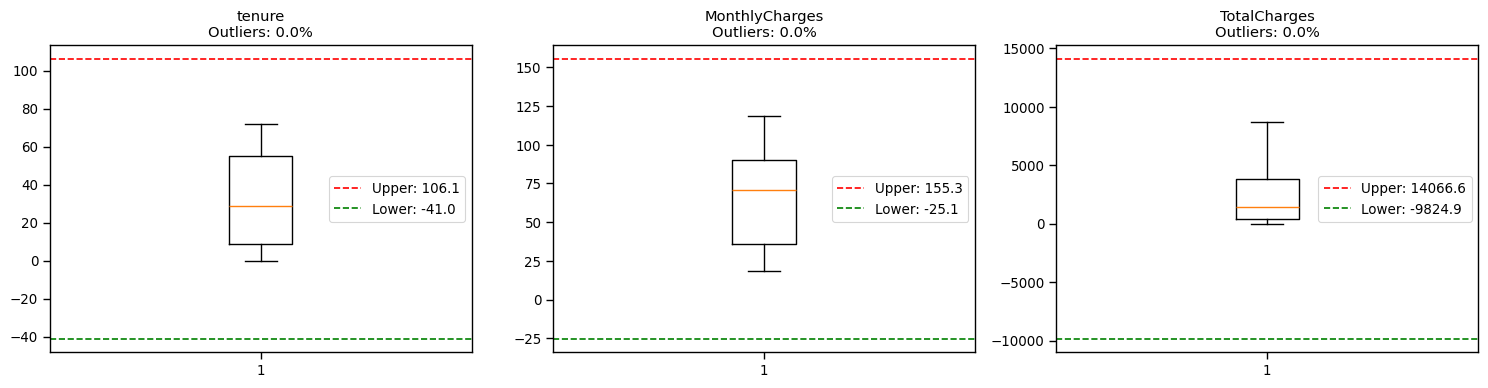

In [31]:
fig, axes = plt.subplots(1, len(column), figsize=(15, 4))

for i, col in enumerate(column):
    # Plot boxplot
    axes[i].boxplot(x_train[col])
    axes[i].set_title(f'{col}\nOutliers: {percent_total_outlier[i]:.1f}%')
    axes[i].axhline(y=upper_bound[i], color='red', linestyle='--', label=f'Upper: {upper_bound[i]:.1f}')
    axes[i].axhline(y=lower_bound[i], color='green', linestyle='--', label=f'Lower: {lower_bound[i]:.1f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

## 5.6 Split Between Numeric Columns and Categorical Columns

In [32]:
# pisah kategorikal ordinal dengan kategorikal nominal
nominal_diskrit = ['tenure']
nominal_continue = ['MonthlyCharges', 'TotalCharges']

# Get the numerical and categorical columns
print('nominal_diskrit Columns : ', nominal_diskrit)
print('nominal_continue Columns : ', nominal_continue)

print('Categorical Nominal Columns : ', kategorikal_nominal)
print('Categorical Ordinal Columns : ', kategorikal_ordinal)

nominal_diskrit Columns :  ['tenure']
nominal_continue Columns :  ['MonthlyCharges', 'TotalCharges']
Categorical Nominal Columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
Categorical Ordinal Columns :  ['Contract']


# 6. Feature Selection

In [33]:
numerical_features = nominal_diskrit + nominal_continue



# ANOVA F-test untuk numerical features
f_scores, p_values = f_classif(x_train[numerical_features], y_train_encoded)
numerical_results = pd.DataFrame({
    'feature': numerical_features,
    'f_score': f_scores,
    'p_value': p_values,
    'significant': p_values < 0.05
}).sort_values('p_value')

numerical_results


,feature,f_score,p_value,significant
0,tenure,779.835426,7.712429e-161,True
2,TotalCharges,229.879309,6.341153e-51,True
1,MonthlyCharges,206.467511,5.231604e-46,True


In [34]:
categorical_features = kategorikal_nominal + kategorikal_ordinal

# Chi-Square Test untuk categorical features
chi2_results = []
for feature in categorical_features:
    contingency_table = pd.crosstab(x_train[feature], y_train_encoded)
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({
        'feature': feature,
        'chi2_statistic': chi2_stat,
        'p_value': p_value,
        'significant': p_value < 0.05
    })

categorical_results = pd.DataFrame(chi2_results).sort_values('p_value')
categorical_results




,feature,chi2_statistic,p_value,significant
14,Contract,939.618470,9.213864e-205,True
6,OnlineSecurity,660.964360,2.974492e-144,True
9,TechSupport,653.934911,9.996280e-143,True
5,InternetService,569.509594,2.150616e-124,True
13,PaymentMethod,519.798660,2.442564e-112,True
7,OnlineBackup,462.317752,4.064206e-101,True
8,DeviceProtection,434.361140,4.782742e-95,True
10,StreamingTV,294.234425,1.281759e-64,True
11,StreamingMovies,294.163963,1.327722e-64,True
12,PaperlessBilling,213.599173,2.252471e-48,True


# 7. Pipeline

In [35]:

# scalling numerikal continue columns
con_scaler = StandardScaler()

# scalling numerikal diskrit columns
disk_scaler = MinMaxScaler()

# encode kategorikal nominal  columns
num_encoder = OneHotEncoder(drop='first', sparse_output=False)

# encode kategorikal ordinal  columns
# Definisikan urutan kategori yang sama untuk ketiga kolom
ordinal_categories = ['Month-to-month', 'One year', 'Two year']
ord_encoder = OrdinalEncoder(categories=[ordinal_categories])



In [36]:
#  buat FE pipe line

# Numerical continue pipeline
num_con_pipe = sklPipeline([
    ('scaling_con', con_scaler)
])

# Numerical diskrit pipeline
num_disk_pipe = sklPipeline([
    ('scaling_disk', disk_scaler)
])

# categorical nominal  pipeline
cat_num_pipe = sklPipeline([
    ('Encode_num', num_encoder)
])

# categorical ordinal pipeline
cat_ordinal_pipe = sklPipeline([
    ('Encode2_ord', ord_encoder)
])

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', cat_num_pipe, kategorikal_nominal),
        ('ordinal', cat_ordinal_pipe, kategorikal_ordinal),
        ('num_continue', num_con_pipe, nominal_continue),
        ('num_diskrit', num_disk_pipe, nominal_diskrit),
        ('already_encoded', 'passthrough', ['SeniorCitizen'])
    ]
)

# 8. Model Definition

In [38]:
# buat model

Knn = KNeighborsClassifier(n_neighbors=5)
Svc = SVC(probability=True, random_state=44, C=1.0, kernel='rbf')
Dt = DecisionTreeClassifier(random_state=44, max_depth=10)
Rf = RandomForestClassifier(random_state=44, n_estimators=100, max_depth=12)
Gb = GradientBoostingClassifier(random_state=44, n_estimators=100, learning_rate=0.1)
Xgb = XGBClassifier(random_state=44, n_estimators=100, learning_rate=0.1)

In [39]:
#hubungkan preproses dengan model
pipe_Knn = sklPipeline([
                        ('fe', preprocessor),
                        ('KNN', Knn)])

pipe_Svc = sklPipeline([
                        ('fe', preprocessor),
                        ('SVC', Svc)])

pipe_Dt = sklPipeline([
                       ('fe', preprocessor),
                       ('DT', Dt)])

pipe_Rf = sklPipeline([
                       ('fe', preprocessor),
                       ('RF', Rf)])

pipe_Gb = sklPipeline([
                       ('fe', preprocessor),
                       ('GB', Gb)])

pipe_Xgb = sklPipeline([
                       ('fe', preprocessor),
                       ('XGB', Xgb)])

# 9. Model Training

In [40]:
pipe_Knn.fit(x_train,y_train_encoded)

Pipeline(steps=[('fe',
                 ColumnTransformer(transformers=[('nominal',
                                                  Pipeline(steps=[('Encode_num',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'Payme...
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]))]),
                                                  ['Contract']),
                                                 ('num_continue',
                                                  Pipeline(steps=[('scaling_con',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('num_diskrit',
                                                  Pipeline(steps=[('scaling_disk',
                                                                   MinMaxScaler())]),
                                                  ['tenure']),
                                                 ('already_encoded',
                                                  'passthrough',
                                                  ['SeniorCitizen'])])),
                ('KNN', KNeighborsClassifier())])

In [41]:
pipe_Svc.fit(x_train,y_train_encoded)

Pipeline(steps=[('fe',
                 ColumnTransformer(transformers=[('nominal',
                                                  Pipeline(steps=[('Encode_num',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'Payme...
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]))]),
                                                  ['Contract']),
                                                 ('num_continue',
                                                  Pipeline(steps=[('scaling_con',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('num_diskrit',
                                                  Pipeline(steps=[('scaling_disk',
                                                                   MinMaxScaler())]),
                                                  ['tenure']),
                                                 ('already_encoded',
                                                  'passthrough',
                                                  ['SeniorCitizen'])])),
                ('SVC', SVC(probability=True, random_state=44))])

In [42]:
pipe_Dt.fit(x_train,y_train_encoded)

Pipeline(steps=[('fe',
                 ColumnTransformer(transformers=[('nominal',
                                                  Pipeline(steps=[('Encode_num',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'Payme...
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]))]),
                                                  ['Contract']),
                                                 ('num_continue',
                                                  Pipeline(steps=[('scaling_con',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('num_diskrit',
                                                  Pipeline(steps=[('scaling_disk',
                                                                   MinMaxScaler())]),
                                                  ['tenure']),
                                                 ('already_encoded',
                                                  'passthrough',
                                                  ['SeniorCitizen'])])),
                ('DT', DecisionTreeClassifier(max_depth=10, random_state=44))])

In [43]:
pipe_Rf.fit(x_train,y_train_encoded)

Pipeline(steps=[('fe',
                 ColumnTransformer(transformers=[('nominal',
                                                  Pipeline(steps=[('Encode_num',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'Payme...
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]))]),
                                                  ['Contract']),
                                                 ('num_continue',
                                                  Pipeline(steps=[('scaling_con',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('num_diskrit',
                                                  Pipeline(steps=[('scaling_disk',
                                                                   MinMaxScaler())]),
                                                  ['tenure']),
                                                 ('already_encoded',
                                                  'passthrough',
                                                  ['SeniorCitizen'])])),
                ('RF', RandomForestClassifier(max_depth=12, random_state=44))])

In [44]:
pipe_Gb.fit(x_train,y_train_encoded)

Pipeline(steps=[('fe',
                 ColumnTransformer(transformers=[('nominal',
                                                  Pipeline(steps=[('Encode_num',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'Payme...
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]))]),
                                                  ['Contract']),
                                                 ('num_continue',
                                                  Pipeline(steps=[('scaling_con',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('num_diskrit',
                                                  Pipeline(steps=[('scaling_disk',
                                                                   MinMaxScaler())]),
                                                  ['tenure']),
                                                 ('already_encoded',
                                                  'passthrough',
                                                  ['SeniorCitizen'])])),
                ('GB', GradientBoostingClassifier(random_state=44))])

In [45]:
pipe_Xgb.fit(x_train,y_train_encoded)

Pipeline(steps=[('fe',
                 ColumnTransformer(transformers=[('nominal',
                                                  Pipeline(steps=[('Encode_num',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'Payme...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=44, ...))])

# 10. Model Evaluation


EVALUATING KNN
F1 Score - Train Set  :  0.7878830225876639 

Classification Report - Train:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      4139
           1       0.72      0.65      0.68      1495

    accuracy                           0.84      5634
   macro avg       0.80      0.78      0.79      5634
weighted avg       0.84      0.84      0.84      5634


Cross Validation Results:
F1 Score - All - Cross Validation  :  [0.69511087 0.68963878 0.67784641]
F1 Score - Mean - Cross Validation :  0.6875320185883611
F1 Score - Std - Cross Validation  :  0.007203896694641515
F1 Score - Range of Test-Set       :  0.6803281218937196 - 0.6947359152830026

Test Set Results:
F1 Score - Test Set   :  0.6894674034574697 

Classification Report - Test:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1035
           1       0.57      0.50      0.53       374

    accuracy             

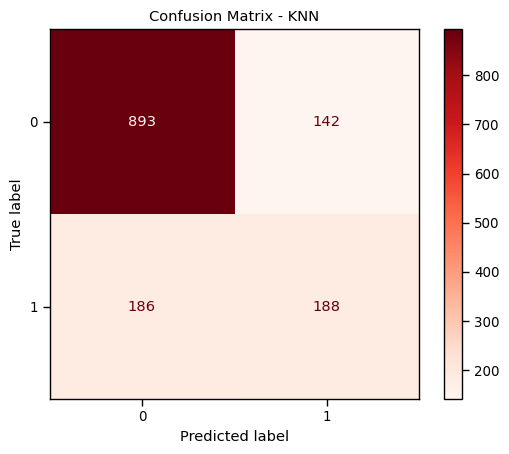


EVALUATING SVC
F1 Score - Train Set  :  0.7373413072051138 

Classification Report - Train:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      4139
           1       0.71      0.51      0.59      1495

    accuracy                           0.81      5634
   macro avg       0.77      0.72      0.74      5634
weighted avg       0.81      0.81      0.80      5634


Cross Validation Results:
F1 Score - All - Cross Validation  :  [0.7229631  0.70695005 0.71304027]
F1 Score - Mean - Cross Validation :  0.7143178094457584
F1 Score - Std - Cross Validation  :  0.00659941960614746
F1 Score - Range of Test-Set       :  0.707718389839611 - 0.7209172290519058

Test Set Results:
F1 Score - Test Set   :  0.7273885378011691 

Classification Report - Test:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      1035
           1       0.71      0.49      0.58       374

    accuracy               

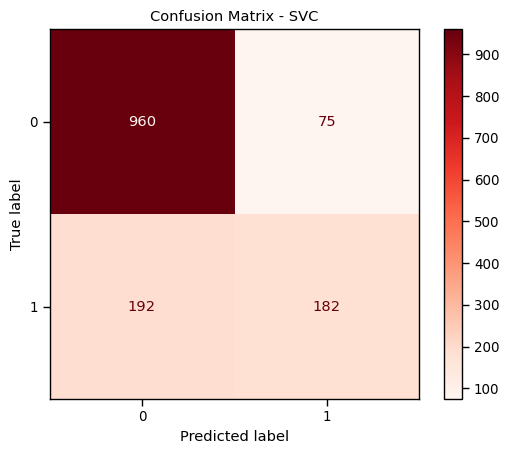


EVALUATING Decision Tree
F1 Score - Train Set  :  0.8324331383936918 

Classification Report - Train:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4139
           1       0.81      0.70      0.75      1495

    accuracy                           0.88      5634
   macro avg       0.85      0.82      0.83      5634
weighted avg       0.87      0.88      0.87      5634


Cross Validation Results:
F1 Score - All - Cross Validation  :  [0.66131275 0.66653665 0.67958937]
F1 Score - Mean - Cross Validation :  0.6691462603271927
F1 Score - Std - Cross Validation  :  0.0076861881275633774
F1 Score - Range of Test-Set       :  0.6614600721996293 - 0.6768324484547561

Test Set Results:
F1 Score - Test Set   :  0.6597117070179153 

Classification Report - Test:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1035
           1       0.53      0.45      0.49       374

    accuracy  

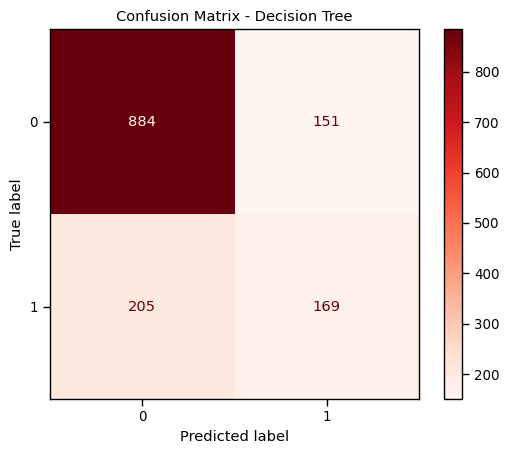


EVALUATING Random Forest
F1 Score - Train Set  :  0.9218867627429423 

Classification Report - Train:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      4139
           1       0.91      0.86      0.88      1495

    accuracy                           0.94      5634
   macro avg       0.93      0.91      0.92      5634
weighted avg       0.94      0.94      0.94      5634


Cross Validation Results:
F1 Score - All - Cross Validation  :  [0.72143402 0.70838136 0.71899048]
F1 Score - Mean - Cross Validation :  0.7162686164288162
F1 Score - Std - Cross Validation  :  0.005665647949180835
F1 Score - Range of Test-Set       :  0.7106029684796354 - 0.721934264377997

Test Set Results:
F1 Score - Test Set   :  0.7333249687924651 

Classification Report - Test:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1035
           1       0.69      0.51      0.59       374

    accuracy    

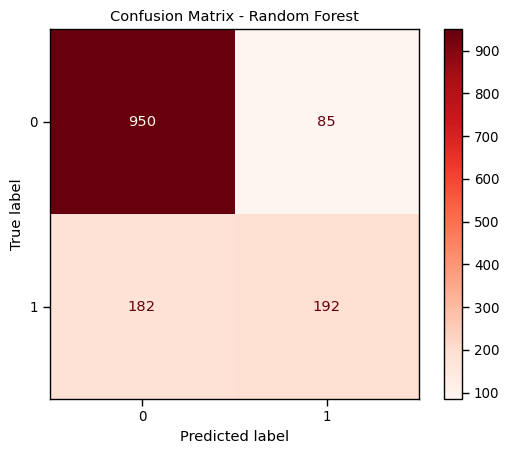


EVALUATING Gradient Boosting
F1 Score - Train Set  :  0.750654130967677 

Classification Report - Train:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4139
           1       0.71      0.55      0.62      1495

    accuracy                           0.82      5634
   macro avg       0.78      0.73      0.75      5634
weighted avg       0.81      0.82      0.81      5634


Cross Validation Results:
F1 Score - All - Cross Validation  :  [0.73896793 0.7027876  0.73538608]
F1 Score - Mean - Cross Validation :  0.7257138694595945
F1 Score - Std - Cross Validation  :  0.016277134330491064
F1 Score - Range of Test-Set       :  0.7094367351291034 - 0.7419910037900855

Test Set Results:
F1 Score - Test Set   :  0.7431404636334346 

Classification Report - Test:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1035
           1       0.71      0.53      0.61       374

    accuracy

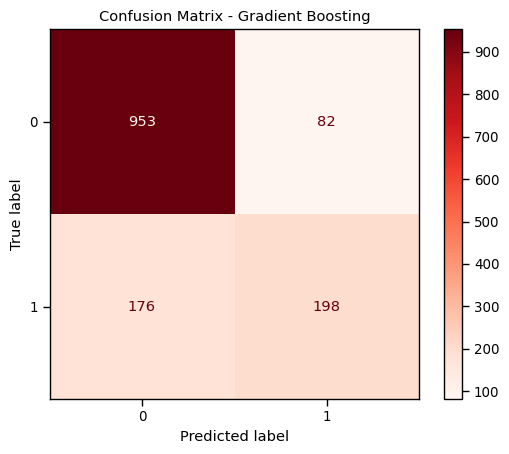


EVALUATING XGBoost
F1 Score - Train Set  :  0.8152284420642837 

Classification Report - Train:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4139
           1       0.79      0.66      0.72      1495

    accuracy                           0.86      5634
   macro avg       0.84      0.80      0.82      5634
weighted avg       0.86      0.86      0.86      5634


Cross Validation Results:
F1 Score - All - Cross Validation  :  [0.71429653 0.70540822 0.71370056]
F1 Score - Mean - Cross Validation :  0.7111351002934473
F1 Score - Std - Cross Validation  :  0.004056819009549716
F1 Score - Range of Test-Set       :  0.7070782812838976 - 0.715191919302997

Test Set Results:
F1 Score - Test Set   :  0.7320380357649731 

Classification Report - Test:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1035
           1       0.69      0.51      0.59       374

    accuracy          

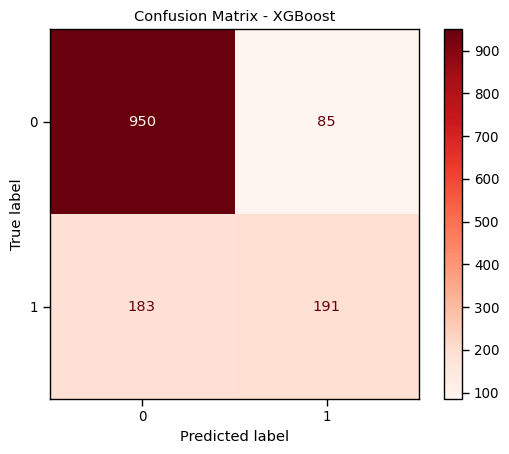


SUMMARY ALL MODELS


,F1_Train,F1_CV_Mean,F1_CV_Std,F1_Test
KNN,0.787883,0.687532,0.007204,0.689467
SVC,0.737341,0.714318,0.006599,0.727389
Decision Tree,0.832433,0.669146,0.007686,0.659712
Random Forest,0.921887,0.716269,0.005666,0.733325
Gradient Boosting,0.750654,0.725714,0.016277,0.743140
XGBoost,0.815228,0.711135,0.004057,0.732038


In [46]:
pipelines = [
    ('KNN', pipe_Knn),
    ('SVC', pipe_Svc), 
    ('Decision Tree', pipe_Dt),
    ('Random Forest', pipe_Rf),
    ('Gradient Boosting', pipe_Gb),
    ('XGBoost', pipe_Xgb)
]

# Dictionary untuk menyimpan results
results = {}

for model_name, pipeline in pipelines:
    print(f"\n{'='*50}")
    print(f"EVALUATING {model_name}")
    print(f"{'='*50}")
    
    # HAPUS LINE INI - SUDAH DITRAIN SEBELUMNYA
    # pipeline.fit(x_train, y_train_encoded)
    
    # Predict train set
    y_pred_train = pipeline.predict(x_train)
    
    # Check Performance Model against Train-Set
    print('F1 Score - Train Set  : ', f1_score(y_train_encoded, y_pred_train, average='macro'), '\n')
    print('Classification Report - Train:\n', classification_report(y_train_encoded, y_pred_train))
    
    # Cross Validation
    train_crossval = cross_val_score(pipeline, x_train, y_train_encoded, 
                                    cv=3, scoring="f1_macro")
    
    print('\nCross Validation Results:')
    print('F1 Score - All - Cross Validation  : ', train_crossval)
    print('F1 Score - Mean - Cross Validation : ', train_crossval.mean())
    print('F1 Score - Std - Cross Validation  : ', train_crossval.std())
    print('F1 Score - Range of Test-Set       : ', (train_crossval.mean()-train_crossval.std()) , '-', (train_crossval.mean()+train_crossval.std()))
    
    # Check Performance Model against Test-Set
    y_pred_test = pipeline.predict(x_test)
    
    print('\nTest Set Results:')
    print('F1 Score - Test Set   : ', f1_score(y_test_encoded, y_pred_test, average='macro'), '\n')
    print('Classification Report - Test:\n', classification_report(y_test_encoded, y_pred_test))
    
    # Confusion Matrix
    print('Confusion Matrix:')
    ConfusionMatrixDisplay.from_estimator(pipeline, x_test, y_test_encoded, cmap='Reds')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    # Simpan results
    results[model_name] = {
        'F1_Train': f1_score(y_train_encoded, y_pred_train, average='macro'),
        'F1_CV_Mean': train_crossval.mean(),
        'F1_CV_Std': train_crossval.std(),
        'F1_Test': f1_score(y_test_encoded, y_pred_test, average='macro')
    }

# Summary semua model
print(f"\n{'='*60}")
print("SUMMARY ALL MODELS")
print(f"{'='*60}")

summary_df = pd.DataFrame(results).T
summary_df

## 10.1 ROC-AUC Evaluation

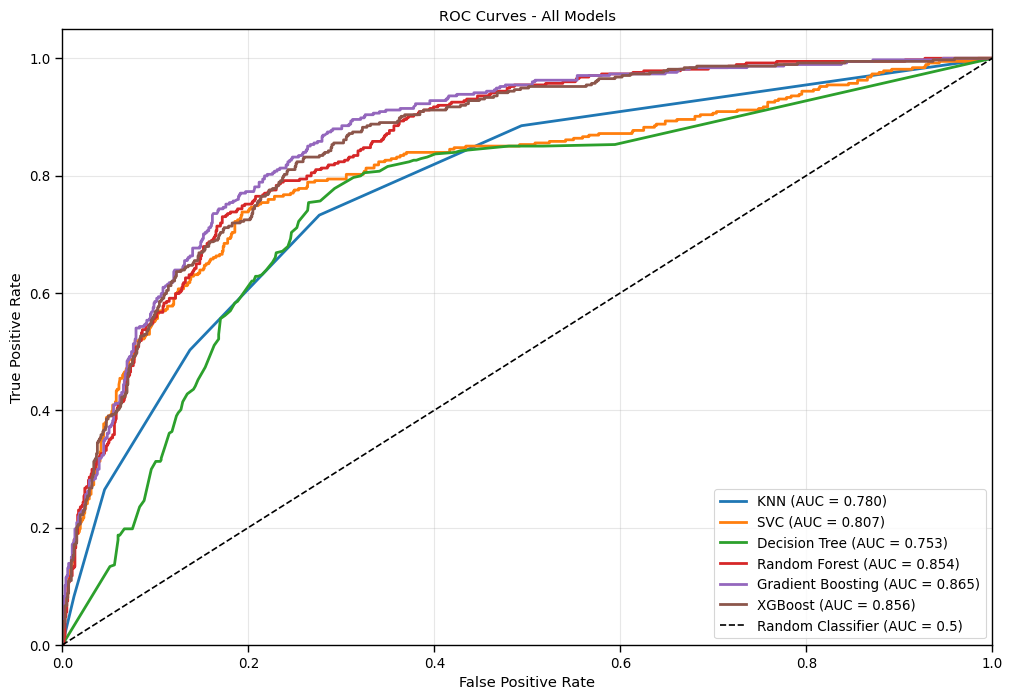

ROC-AUC Scores for All Models:
KNN                  : 0.7804
SVC                  : 0.8069
Decision Tree        : 0.7532
Random Forest        : 0.8537
Gradient Boosting    : 0.8654
XGBoost              : 0.8558

AUC Scores Sorted (Best to Worst):
               Model  AUC_Score
4  Gradient Boosting   0.865431
5            XGBoost   0.855831
3      Random Forest   0.853712
1                SVC   0.806925
0                KNN   0.780388
2      Decision Tree   0.753211

FINAL SUMMARY WITH AUC SCORES


,F1_Train,F1_CV_Mean,F1_CV_Std,F1_Test,AUC_Test
Gradient Boosting,0.750654,0.725714,0.016277,0.743140,0.865431
XGBoost,0.815228,0.711135,0.004057,0.732038,0.855831
Random Forest,0.921887,0.716269,0.005666,0.733325,0.853712
SVC,0.737341,0.714318,0.006599,0.727389,0.806925
KNN,0.787883,0.687532,0.007204,0.689467,0.780388
Decision Tree,0.832433,0.669146,0.007686,0.659712,0.753211


In [47]:
# Dictionary untuk menyimpan ROC-AUC results
roc_results = {}

plt.figure(figsize=(12, 8))

for model_name, pipeline in pipelines:
    # Predict probabilities untuk test set
    y_pred_proba = pipeline.predict_proba(x_test)[:, 1]
    
    # Calculate ROC-AUC
    auc_score = roc_auc_score(y_test_encoded, y_pred_proba)
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})', linewidth=2)
    
    # Simpan results
    roc_results[model_name] = {
        'AUC_Score': auc_score,
        'FPR': fpr,
        'TPR': tpr,
        'Thresholds': thresholds
    }

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Display AUC scores
print("ROC-AUC Scores for All Models:")
print("=" * 40)
for model_name, scores in roc_results.items():
    print(f"{model_name:20} : {scores['AUC_Score']:.4f}")

# Buat DataFrame untuk comparison
auc_comparison = pd.DataFrame({
    'Model': list(roc_results.keys()),
    'AUC_Score': [scores['AUC_Score'] for scores in roc_results.values()]
}).sort_values('AUC_Score', ascending=False)

print("\nAUC Scores Sorted (Best to Worst):")
print("=" * 45)
print(auc_comparison)

# Simpan ke results utama juga
for model_name in results.keys():
    if model_name in roc_results:
        results[model_name]['AUC_Test'] = roc_results[model_name]['AUC_Score']

# Update summary dengan AUC
print(f"\n{'='*60}")
print("FINAL SUMMARY WITH AUC SCORES")
print(f"{'='*60}")
final_summary = pd.DataFrame(results).T
final_summary = final_summary[['F1_Train', 'F1_CV_Mean', 'F1_CV_Std', 'F1_Test', 'AUC_Test']]
final_summary.sort_values('AUC_Test', ascending=False)

# 11. HYPERPARAMETER TUNING

In [51]:
# # Baseline sudah bagus, fine-tune minor saja
# minimal_tune_grid = {
#     'GB__learning_rate': [0.09, 0.1, 0.11],
#     'GB__subsample': [0.95, 1.0]
# }

# minimal_grid = GridSearchCV(
#     estimator=pipe_Gb,
#     param_grid=minimal_tune_grid,
#     scoring='f1_macro', 
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )

# minimal_grid.fit(x_train, y_train_encoded)
# print(f"Minimal tune CV Score: {minimal_grid.best_score_:.6f}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Minimal tune CV Score: 0.723260


# 12. Model Saving

In [49]:
# best_model = pipe_Gb

In [50]:
# with open('model.pkl', 'wb') as file:
#     pickle.dump(best_model, file)